In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
con=pd.read_csv("concrete.csv")
con

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# DATA ANALYSIS

In [3]:
con.keys()

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [4]:
con.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [5]:
con.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
con.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
con.tail()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


# DATA CLEANING

In [8]:
con.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

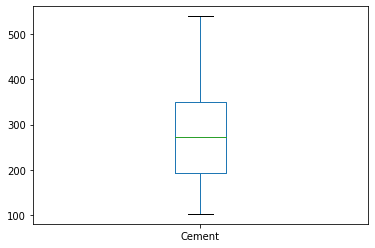

In [9]:
con['Cement'].plot.box()

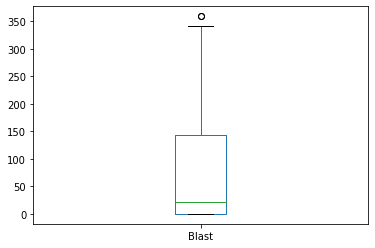

In [10]:
con['Blast'].plot.box()

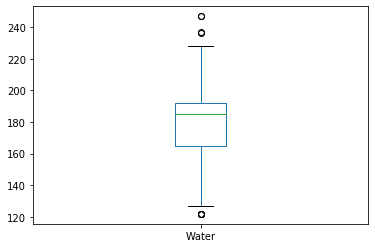

In [11]:
con['Water'].plot.box()

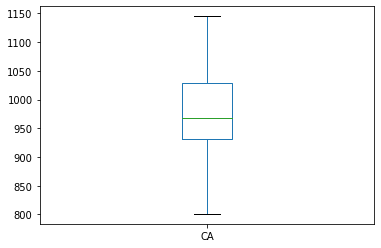

In [12]:
con['CA'].plot.box()

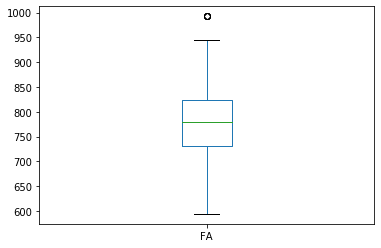

In [13]:
con['FA'].plot.box()

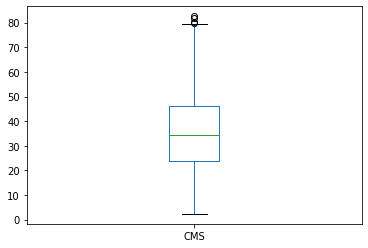

In [14]:
con['CMS'].plot.box()

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(con))
z

array([[2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        2.64540763],
       [2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        1.56142148],
       [0.49142531, 0.79552649, 0.84714393, ..., 2.24091709, 3.55306569,
        0.26662698],
       ...,
       [1.27008832, 0.75957923, 0.85063487, ..., 0.0801067 , 0.27973311,
        0.72572939],
       [1.16860982, 1.30806485, 0.84714393, ..., 0.19116644, 0.27973311,
        0.18253855],
       [0.19403325, 0.30849909, 0.3769452 , ..., 0.15074782, 0.27973311,
        0.20469738]])

In [16]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


In [17]:
con_new=con[(z<3).all(axis=1)]
con_new

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [18]:
print(con.shape)
print(con_new.shape)

(1030, 9)
(981, 9)


In [19]:
con_new.skew()

Cement              0.508557
Blast               0.747827
Fly Ash             0.461726
Water              -0.017778
Superplasticizer    0.416828
CA                 -0.087932
FA                 -0.226214
Age                 1.940232
CMS                 0.463962
dtype: float64

# EDA process

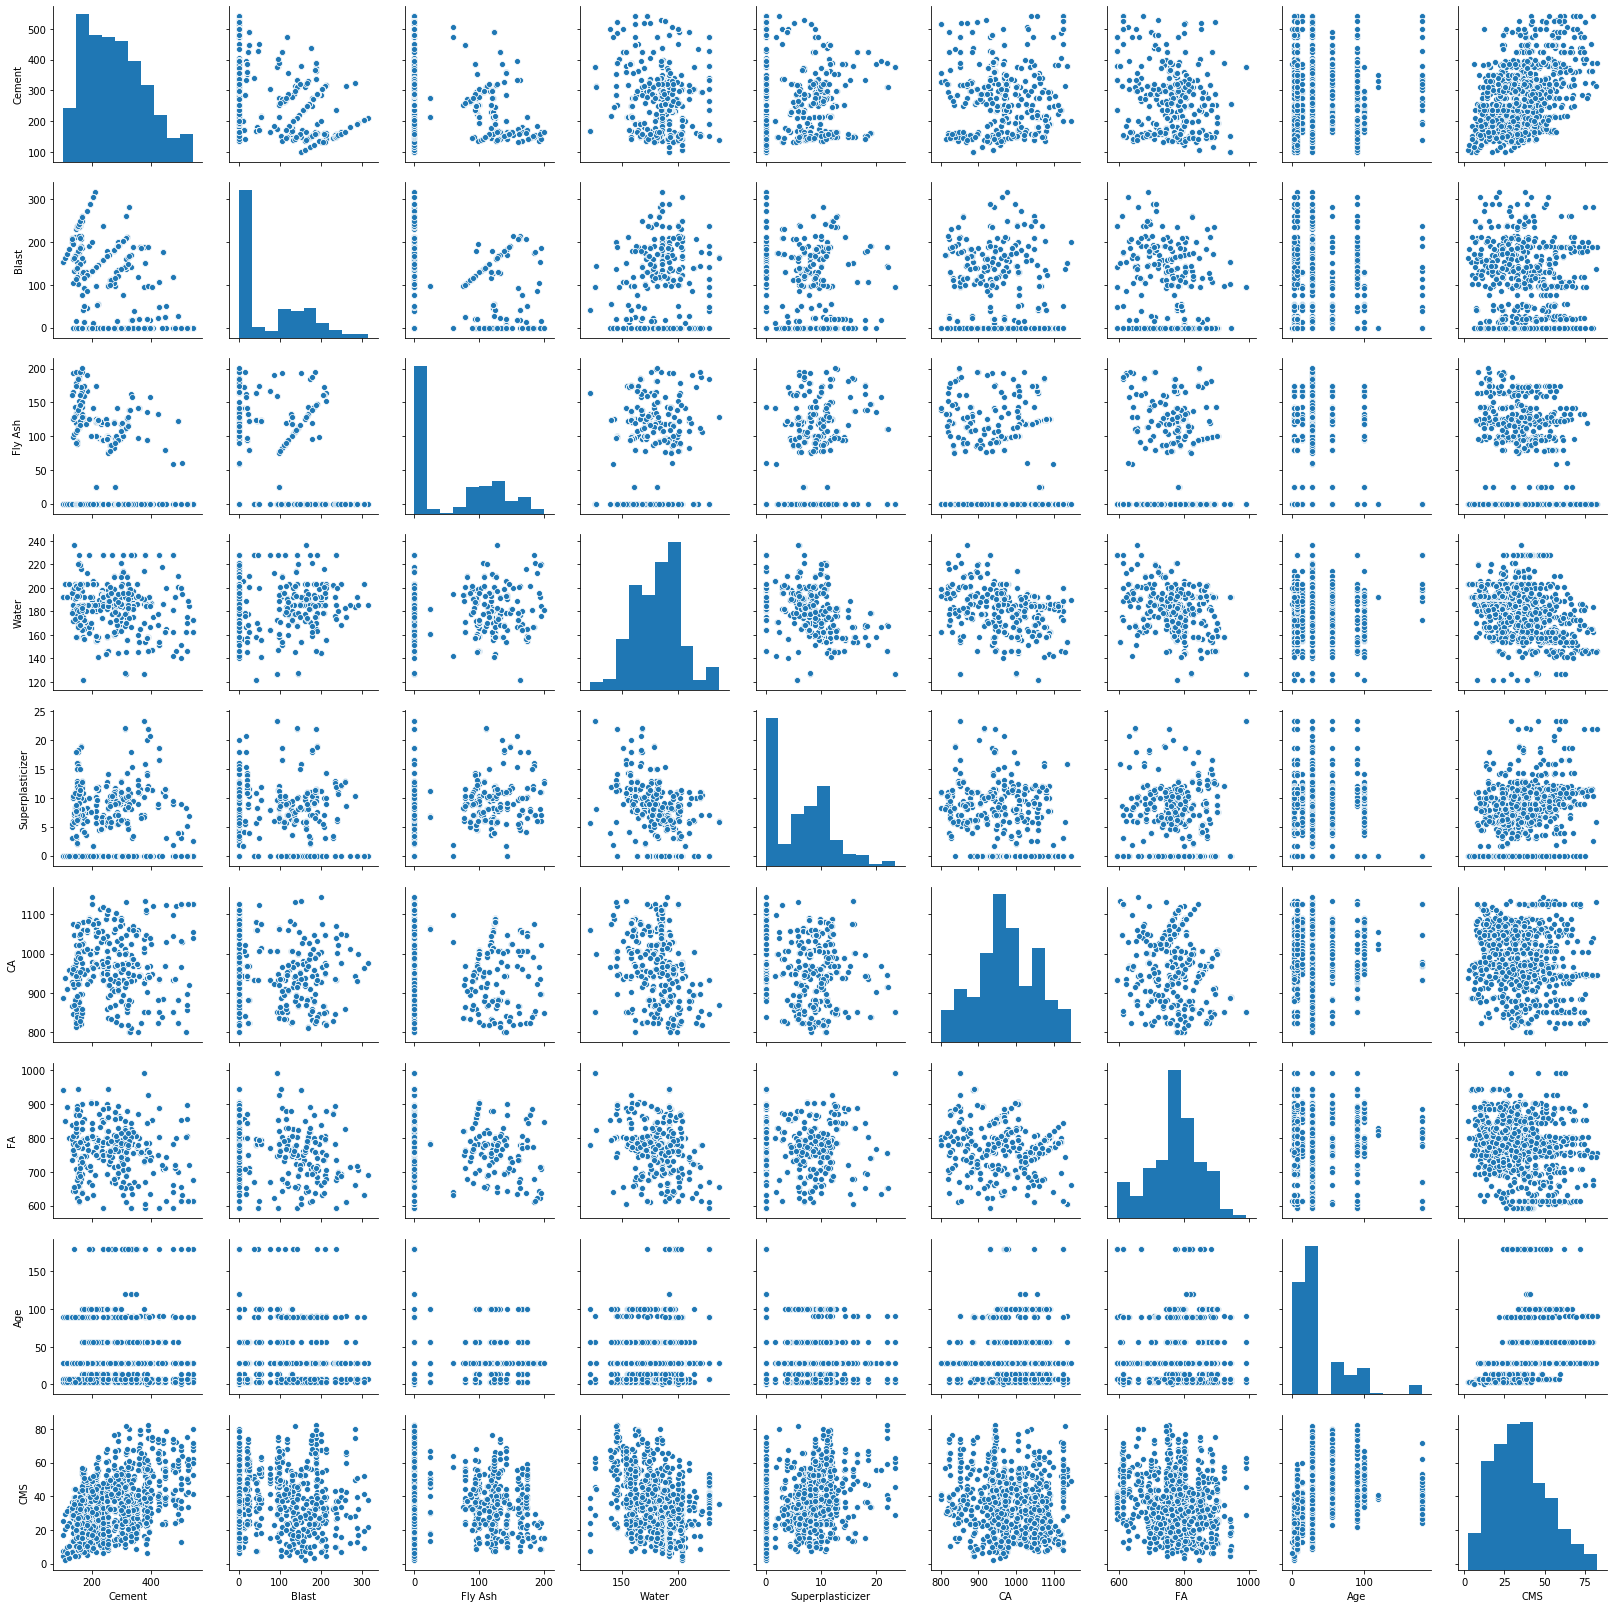

In [20]:
sns.pairplot(con_new)

In [21]:
con_new.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

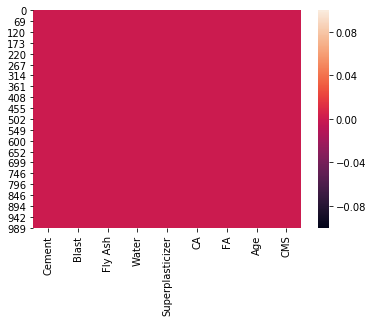

In [22]:
sns.heatmap(con_new.isnull())

# SPLIT DATA ITO X AND Y FOR TRAINING AND TESTING

In [23]:
x=con_new.iloc[:,0:-1]

In [24]:
x

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [25]:
x.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28


In [26]:
y=con_new.iloc[:,-1]
y.head()

0    79.99
1    61.89
5    47.03
7    36.45
8    45.85
Name: CMS, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=21)

In [29]:
x_train.shape

(774, 8)

In [30]:
y_train.shape

(774,)

In [31]:
x_test.shape

(207, 8)

In [32]:
y_test.shape

(207,)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# APPLY MODEL

In [62]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='r2'
# Spot Check Algorithms
models = []
models.append(('lm', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('dtc', DecisionTreeRegressor()))

results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=20)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lm: 0.674395 (0.046708)
LASSO: 0.674255 (0.047126)
EN: 0.674358 (0.046974)
KNN: 0.672481 (0.051552)
dtc: 0.813401 (0.049208)


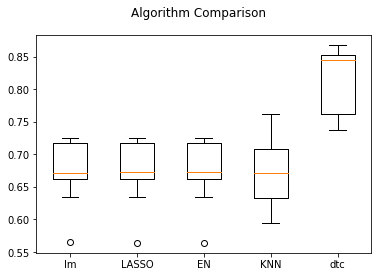

In [63]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [75]:
from sklearn.model_selection import GridSearchCV
# Build parameter grid
params= {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40]
              }
# Build the model
model = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.811435 using {'criterion': 'mse', 'min_samples_split': 10}
0.811435 (0.042667) with: {'criterion': 'mse', 'min_samples_split': 10}
0.798476 (0.056863) with: {'criterion': 'mse', 'min_samples_split': 20}
0.731541 (0.054258) with: {'criterion': 'mse', 'min_samples_split': 40}
0.758773 (0.057851) with: {'criterion': 'mae', 'min_samples_split': 10}
0.769315 (0.052217) with: {'criterion': 'mae', 'min_samples_split': 20}
0.720650 (0.042788) with: {'criterion': 'mae', 'min_samples_split': 40}


In [71]:
#Make predictions
dtc=DecisionTreeRegressor(criterion='mse',min_samples_split= 10)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc))
print(mean_squared_error(y_test,preddtc))

0.8774404771231734
35.96765471014493


In [72]:
#save the model
from sklearn.externals import joblib
joblib.dump(dtc,"concrete_.pkl")

['concrete_.pkl']